In [1]:
# https://biblio.wiki/wiki/Casino_Royale
import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('The_Sun_Also_Rises.txt').read()

In [2]:
raw1

'Robert Cohn was once middleweight boxing champion of Princeton. Do not think that I am very much impressed by that as a boxing title, but it meant a lot to Cohn. He cared nothing for boxing, in fact he disliked it, but he learned it painfully and thoroughly to counteract the feeling of inferiority and shyness he had felt on being treated as a Jew at Princeton. There was a certain inner comfort in knowing he could knock down anybody who was snooty to him, although, being very shy and a thoroughly nice boy, he never fought except in the gym. He was Spider Kelly’s star pupil. Spider Kelly taught all his young gentlemen to box like featherweights, no matter whether they weighed one hundred and five or two hundred and five pounds. But it seemed to fit Cohn. He was really very fast. He was so good that Spider promptly overmatched him and got his nose permanently flattened. This increased Cohn’s distaste for boxing, but it gave him a certain satisfaction of some strange sort, and it certainl

In [3]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

In [4]:
#The number of token
len(tokens1)

88602

In [5]:
len(sentence1)

5604

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

5554

In [7]:
print (len(set(tokens_low))/len(tokens1))

0.06268481524119095


In [8]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
text

[<Text: Robert Cohn was once middleweight boxing champion of...>]

In [9]:
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

In [10]:
freq_list

[FreqDist({'robert': 107,
           'cohn': 221,
           'was': 1161,
           'once': 22,
           'middleweight': 3,
           'boxing': 7,
           'champion': 3,
           'of': 1122,
           'princeton': 8,
           '.': 5392,
           'do': 235,
           'not': 413,
           'think': 115,
           'that': 583,
           'i': 2331,
           'am': 14,
           'very': 172,
           'much': 62,
           'impressed': 5,
           'by': 103,
           'as': 219,
           'a': 1531,
           'title': 6,
           ',': 3669,
           'but': 190,
           'it': 1107,
           'meant': 11,
           'lot': 31,
           'to': 1538,
           'he': 1085,
           'cared': 5,
           'nothing': 37,
           'for': 370,
           'in': 1033,
           'fact': 4,
           'disliked': 1,
           'learned': 8,
           'painfully': 1,
           'and': 2285,
           'thoroughly': 2,
           'counteract': 1,
           'the'

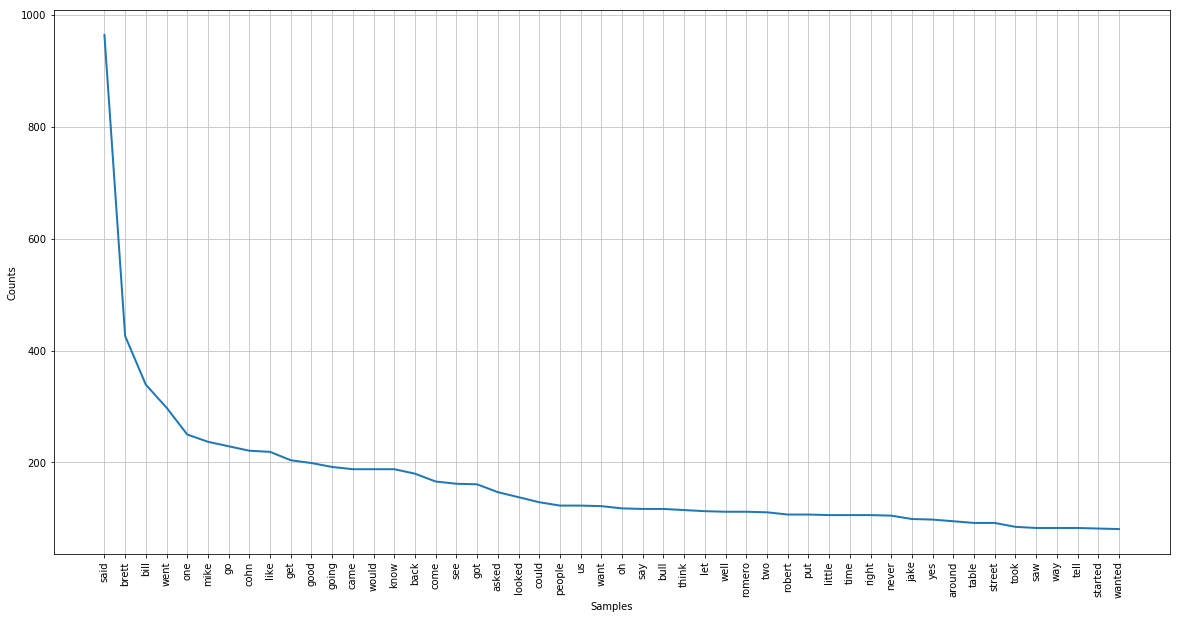

In [11]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [12]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 964),
 ('brett', 426),
 ('bill', 339),
 ('went', 298),
 ('one', 250),
 ('mike', 237),
 ('go', 229),
 ('cohn', 221),
 ('like', 219),
 ('get', 204),
 ('good', 199),
 ('going', 192),
 ('came', 188),
 ('would', 188),
 ('know', 188),
 ('back', 180),
 ('come', 166),
 ('see', 162),
 ('got', 161),
 ('asked', 147),
 ('looked', 138),
 ('could', 129),
 ('people', 123),
 ('us', 123),
 ('want', 122),
 ('oh', 118),
 ('say', 117),
 ('bull', 117),
 ('think', 115),
 ('let', 113),
 ('well', 112),
 ('romero', 112),
 ('two', 111),
 ('robert', 107),
 ('put', 107),
 ('little', 106),
 ('time', 106),
 ('right', 106),
 ('never', 105),
 ('jake', 99),
 ('yes', 98),
 ('around', 95),
 ('table', 92),
 ('street', 92),
 ('took', 85),
 ('saw', 83),
 ('way', 83),
 ('tell', 83),
 ('started', 82),
 ('wanted', 81),
 ('crowd', 80),
 ('look', 79),
 ('room', 79),
 ('hell', 78),
 ('another', 77),
 ('sat', 76),
 ('walked', 74),
 ('drink', 74),
 ('long', 74),
 ('hotel', 74),
 ('town', 73),
 ('turned', 73),
 ('man', 73

In [13]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]

In [14]:
#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

In [15]:
#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
text

[<Text: robert cohn middleweight box champion princeton think much...>]

In [16]:
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['robert',
 'cohn',
 'middleweight',
 'box',
 'champion',
 'princeton',
 'think',
 'much',
 'impress',
 'box',
 'titl',
 'meant',
 'lot',
 'cohn',
 'care',
 'noth',
 'box',
 'fact',
 'dislik',
 'learn',
 'pain',
 'thoroughli',
 'counteract',
 'feel',
 'inferior',
 'shyness',
 'felt',
 'treat',
 'jew',
 'princeton',
 'certain',
 'inner',
 'comfort',
 'know',
 'could',
 'knock',
 'anybodi',
 'snooti',
 'although',
 'shi',
 'thoroughli',
 'nice',
 'boy',
 'never',
 'fought',
 'except',
 'gym',
 'spider',
 'kelli',
 'star',
 'pupil',
 'spider',
 'kelli',
 'taught',
 'young',
 'gentlemen',
 'box',
 'like',
 'featherweight',
 'matter',
 'whether',
 'weigh',
 'one',
 'hundr',
 'five',
 'two',
 'hundr',
 'five',
 'pound',
 'seem',
 'fit',
 'cohn',
 'realli',
 'fast',
 'good',
 'spider',
 'promptli',
 'overmatch',
 'got',
 'nose',
 'perman',
 'flatten',
 'increas',
 'cohn',
 'distast',
 'box',
 'gave',
 'certain',
 'satisfact',
 'strang',
 'sort',
 'certainli',
 'improv',
 'nose',
 'last',
 'ye

In [17]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]
sentence_small

['robert cohn was once middleweight boxing champion of princeton.',
 'do not think that i am very much impressed by that as a boxing title, but it meant a lot to cohn.',
 'he cared nothing for boxing, in fact he disliked it, but he learned it painfully and thoroughly to counteract the feeling of inferiority and shyness he had felt on being treated as a jew at princeton.',
 'there was a certain inner comfort in knowing he could knock down anybody who was snooty to him, although, being very shy and a thoroughly nice boy, he never fought except in the gym.',
 'he was spider kelly’s star pupil.',
 'spider kelly taught all his young gentlemen to box like featherweights, no matter whether they weighed one hundred and five or two hundred and five pounds.',
 'but it seemed to fit cohn.',
 'he was really very fast.',
 'he was so good that spider promptly overmatched him and got his nose permanently flattened.',
 'this increased cohn’s distaste for boxing, but it gave him a certain satisfaction 

In [18]:
#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    print (form)

['robert', 'cohn', 'middleweight', 'box', 'champion', 'princeton.']
['think', 'much', 'impress', 'box', 'title,', 'meant', 'lot', 'cohn.']
['care', 'noth', 'boxing,', 'fact', 'dislik', 'it,', 'learn', 'pain', 'thoroughli', 'counteract', 'feel', 'inferior', 'shyness', 'felt', 'treat', 'jew', 'princeton.']
['certain', 'inner', 'comfort', 'know', 'could', 'knock', 'anybodi', 'snooti', 'him,', 'although,', 'shi', 'thoroughli', 'nice', 'boy,', 'never', 'fought', 'except', 'gym.']
['spider', 'kelly’', 'star', 'pupil.']
['spider', 'kelli', 'taught', 'young', 'gentlemen', 'box', 'like', 'featherweights,', 'matter', 'whether', 'weigh', 'one', 'hundr', 'five', 'two', 'hundr', 'five', 'pounds.']
['seem', 'fit', 'cohn.']
['realli', 'fast.']
['good', 'spider', 'promptli', 'overmatch', 'got', 'nose', 'perman', 'flattened.']
['increas', 'cohn’', 'distast', 'boxing,', 'gave', 'certain', 'satisfact', 'strang', 'sort,', 'certainli', 'improv', 'nose.']
['last', 'year', 'princeton', 'read', 'much', 'took'

In [19]:
#上の本番
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))

In [20]:
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    

In [21]:
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)

In [22]:
text = [text]

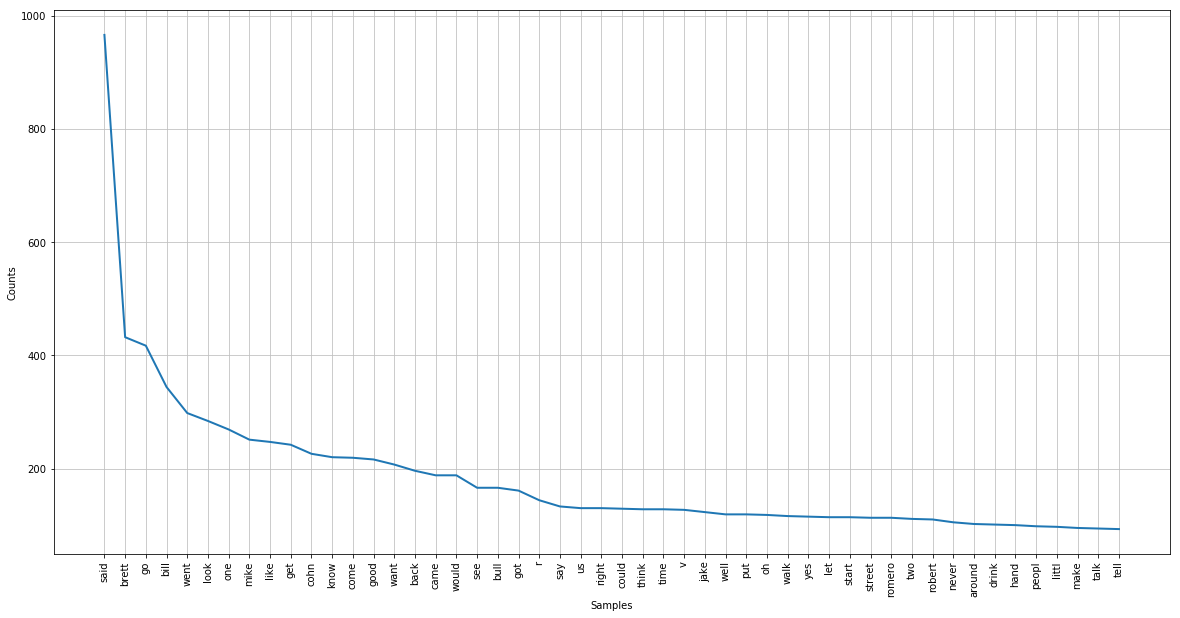

In [23]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

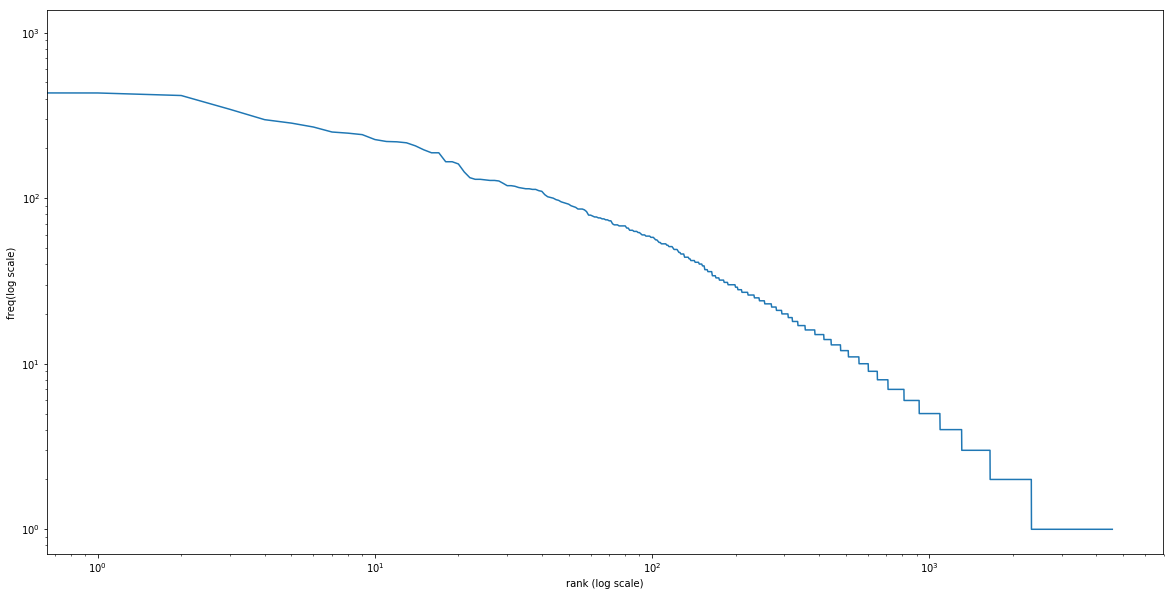

In [24]:
log_freq  = []
for i in f_list_new[0].values():
    log_freq.append(i)
    
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_freq, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('freq(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [25]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 966),
 ('brett', 432),
 ('go', 417),
 ('bill', 344),
 ('went', 298),
 ('look', 284),
 ('one', 269),
 ('mike', 251),
 ('like', 247),
 ('get', 242),
 ('cohn', 226),
 ('know', 220),
 ('come', 219),
 ('good', 216),
 ('want', 207),
 ('back', 196),
 ('came', 188),
 ('would', 188),
 ('see', 166),
 ('bull', 166),
 ('got', 161),
 ('r', 144),
 ('say', 133),
 ('us', 130),
 ('right', 130),
 ('could', 129),
 ('think', 128),
 ('time', 128),
 ('v', 127),
 ('jake', 123),
 ('well', 119),
 ('put', 119),
 ('oh', 118),
 ('walk', 116),
 ('yes', 115),
 ('let', 114),
 ('start', 114),
 ('street', 113),
 ('romero', 113),
 ('two', 111),
 ('robert', 110),
 ('never', 105),
 ('around', 102),
 ('drink', 101),
 ('hand', 100),
 ('peopl', 98),
 ('littl', 97),
 ('make', 95),
 ('talk', 94),
 ('tell', 93),
 ('crowd', 92),
 ('ask', 90),
 ('turn', 89),
 ('way', 88),
 ('hell', 86),
 ('asked', 86),
 ('room', 86),
 ('took', 85),
 ('saw', 83),
 ('long', 79),
 ('hotel', 79),
 ('away', 78),
 ('town', 77),
 ('head', 77)

In [26]:
# let's make new list only with words whose frequency  > 25

moreThan25_freq = []

for i,j in f_list_new[0].items():
    if j >= 25:
        moreThan25_freq.append(i)

In [27]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan25_freq)-1):
    for wn2 in range(wn1+1, len(moreThan25_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan25_freq[wn1] != moreThan25_freq[wn2]:
                
                if moreThan25_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan25_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan25_freq[wn1], moreThan25_freq[wn2]) :s })
        

In [28]:
count_s

{('robert', 'cohn'): 56,
 ('robert', 'think'): 3,
 ('robert', 'much'): 0,
 ('robert', 'lot'): 0,
 ('robert', 'care'): 1,
 ('robert', 'feel'): 2,
 ('robert', 'felt'): 0,
 ('robert', 'know'): 4,
 ('robert', 'could'): 1,
 ('robert', 'knock'): 0,
 ('robert', 'nice'): 0,
 ('robert', 'boy'): 0,
 ('robert', 'never'): 3,
 ('robert', 'like'): 3,
 ('robert', 'matter'): 0,
 ('robert', 'one'): 8,
 ('robert', 'two'): 2,
 ('robert', 'seem'): 0,
 ('robert', 'realli'): 0,
 ('robert', 'good'): 4,
 ('robert', 'got'): 1,
 ('robert', 'gave'): 2,
 ('robert', 'sort'): 0,
 ('robert', 'last'): 2,
 ('robert', 'year'): 3,
 ('robert', 'read'): 1,
 ('robert', 'took'): 1,
 ('robert', 'rememb'): 1,
 ('robert', 'even'): 1,
 ('robert', 'people'): 1,
 ('robert', 'alway'): 2,
 ('robert', 'face'): 3,
 ('robert', 'seen'): 2,
 ('robert', 'someth'): 4,
 ('robert', 'wonder'): 0,
 ('robert', 'new'): 2,
 ('robert', 'end'): 1,
 ('robert', 'made'): 0,
 ('robert', 'ever'): 2,
 ('robert', 'went'): 5,
 ('robert', 'came'): 2,
 ('ro

In [29]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('said', 'brett'), 169),
 (('said', 'bill'), 169),
 (('said', 'mike'), 119),
 (('go', 'said'), 86),
 (('cohn', 'said'), 62),
 (('get', 'said'), 59),
 (('robert', 'cohn'), 56),
 (('said', 'come'), 55),
 (('good', 'said'), 53),
 (('said', 'r'), 52),
 (('said', 'oh'), 51),
 (('like', 'said'), 50),
 (('know', 'said'), 48),
 (('well', 'said'), 45),
 (('said', 'want'), 42),
 (('go', 'want'), 39),
 (('look', 'said'), 39),
 (('one', 'said'), 38),
 (('said', 'v'), 37),
 (('go', 'get'), 36),
 (('go', 'bill'), 36),
 (('said', 'yes'), 36),
 (('said', 'let'), 35),
 (('go', 'brett'), 33),
 (('look', 'brett'), 33),
 (('said', 'see'), 33),
 (('got', 'v'), 31),
 (('said', 'right'), 30),
 (('bull', 'romero'), 30),
 (('like', 'go'), 29),
 (('go', 'let'), 29),
 (('said', 'say'), 29),
 (('cohn', 'brett'), 28),
 (('would', 'said'), 28),
 (('mike', 'bill'), 28),
 (('like', 'would'), 27),
 (('got', 'said'), 27),
 (('back', 'go'), 27),
 (('could', 'see'), 26),
 (('go', 'mike'), 26),
 (('brett', 'mike'), 26),

In [30]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

In [31]:
#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))
new2

{('brett', 'said'): 169,
 ('bill', 'said'): 169,
 ('mike', 'said'): 119,
 ('go', 'said'): 86,
 ('cohn', 'said'): 62,
 ('get', 'said'): 59,
 ('cohn', 'robert'): 56,
 ('come', 'said'): 55,
 ('good', 'said'): 53,
 ('r', 'said'): 52,
 ('oh', 'said'): 51,
 ('like', 'said'): 50,
 ('know', 'said'): 48,
 ('said', 'well'): 45,
 ('said', 'want'): 42,
 ('go', 'want'): 39,
 ('look', 'said'): 39,
 ('one', 'said'): 38,
 ('said', 'v'): 37,
 ('get', 'go'): 36,
 ('bill', 'go'): 36,
 ('said', 'yes'): 36,
 ('let', 'said'): 35,
 ('brett', 'go'): 33,
 ('brett', 'look'): 33,
 ('said', 'see'): 33,
 ('got', 'v'): 31,
 ('right', 'said'): 30,
 ('bull', 'romero'): 30,
 ('go', 'like'): 29,
 ('go', 'let'): 29,
 ('said', 'say'): 29,
 ('brett', 'cohn'): 28,
 ('said', 'would'): 28,
 ('bill', 'mike'): 28,
 ('like', 'would'): 27,
 ('got', 'said'): 27,
 ('back', 'go'): 27,
 ('could', 'see'): 26,
 ('go', 'mike'): 26,
 ('brett', 'mike'): 26,
 ('san', 'sebastian'): 26,
 ('cohn', 'go'): 25,
 ('said', 'think'): 25,
 ('go', '

In [32]:
new3 = dict((k, v) for k, v in new2.items() if v >= 2)
new3

{('brett', 'said'): 169,
 ('bill', 'said'): 169,
 ('mike', 'said'): 119,
 ('go', 'said'): 86,
 ('cohn', 'said'): 62,
 ('get', 'said'): 59,
 ('cohn', 'robert'): 56,
 ('come', 'said'): 55,
 ('good', 'said'): 53,
 ('r', 'said'): 52,
 ('oh', 'said'): 51,
 ('like', 'said'): 50,
 ('know', 'said'): 48,
 ('said', 'well'): 45,
 ('said', 'want'): 42,
 ('go', 'want'): 39,
 ('look', 'said'): 39,
 ('one', 'said'): 38,
 ('said', 'v'): 37,
 ('get', 'go'): 36,
 ('bill', 'go'): 36,
 ('said', 'yes'): 36,
 ('let', 'said'): 35,
 ('brett', 'go'): 33,
 ('brett', 'look'): 33,
 ('said', 'see'): 33,
 ('got', 'v'): 31,
 ('right', 'said'): 30,
 ('bull', 'romero'): 30,
 ('go', 'like'): 29,
 ('go', 'let'): 29,
 ('said', 'say'): 29,
 ('brett', 'cohn'): 28,
 ('said', 'would'): 28,
 ('bill', 'mike'): 28,
 ('like', 'would'): 27,
 ('got', 'said'): 27,
 ('back', 'go'): 27,
 ('could', 'see'): 26,
 ('go', 'mike'): 26,
 ('brett', 'mike'): 26,
 ('san', 'sebastian'): 26,
 ('cohn', 'go'): 25,
 ('said', 'think'): 25,
 ('go', '

In [33]:
#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('brett', 'said'): 169,
 ('bill', 'said'): 169,
 ('mike', 'said'): 119,
 ('go', 'said'): 86,
 ('cohn', 'said'): 62,
 ('get', 'said'): 59,
 ('cohn', 'robert'): 56,
 ('come', 'said'): 55,
 ('good', 'said'): 53,
 ('r', 'said'): 52,
 ('oh', 'said'): 51,
 ('like', 'said'): 50,
 ('know', 'said'): 48,
 ('said', 'well'): 45,
 ('said', 'want'): 42,
 ('go', 'want'): 39,
 ('look', 'said'): 39,
 ('one', 'said'): 38,
 ('said', 'v'): 37,
 ('get', 'go'): 36,
 ('bill', 'go'): 36,
 ('said', 'yes'): 36,
 ('let', 'said'): 35,
 ('brett', 'go'): 33,
 ('brett', 'look'): 33,
 ('said', 'see'): 33,
 ('got', 'v'): 31,
 ('right', 'said'): 30,
 ('bull', 'romero'): 30,
 ('go', 'like'): 29,
 ('go', 'let'): 29,
 ('said', 'say'): 29,
 ('brett', 'cohn'): 28,
 ('said', 'would'): 28,
 ('bill', 'mike'): 28,
 ('like', 'would'): 27,
 ('got', 'said'): 27,
 ('back', 'go'): 27,
 ('could', 'see'): 26,
 ('go', 'mike'): 26,
 ('brett', 'mike'): 26,
 ('san', 'sebastian'): 26,
 ('cohn', 'go'): 25,
 ('said', 'think'): 25,
 ('go', '

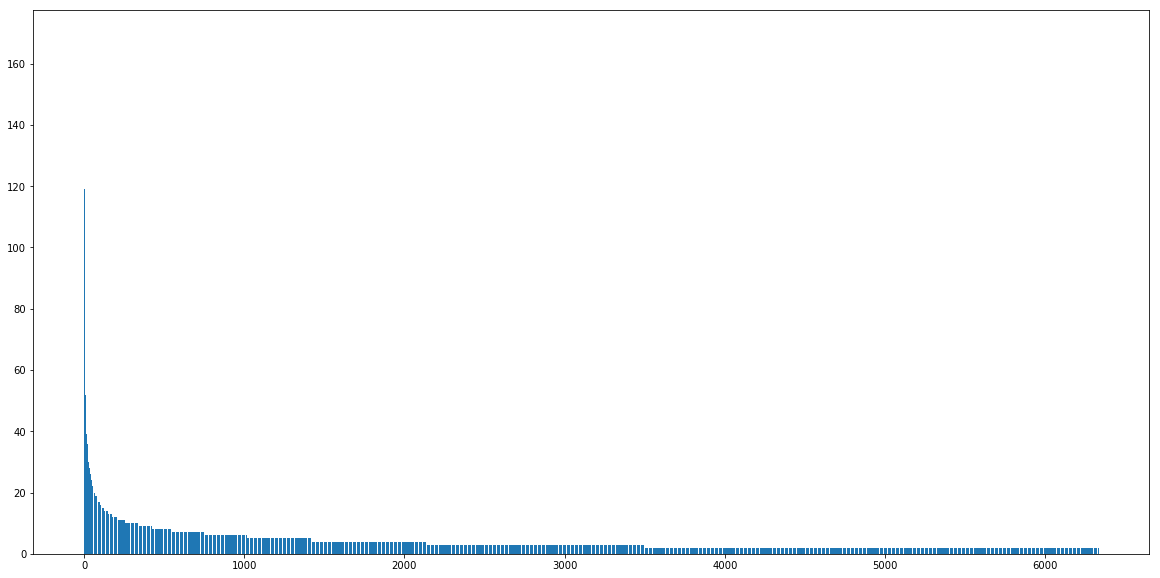

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(new4)), new4.values(), align='center')
# plt.xticks(range(len(new2)), new2.keys())  too many....
#plt.xticks(range(len(new4)), new4.keys())  


# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [35]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)
word_f

[('said', 966),
 ('brett', 432),
 ('go', 417),
 ('bill', 344),
 ('went', 298),
 ('look', 284),
 ('one', 269),
 ('mike', 251),
 ('like', 247),
 ('get', 242),
 ('cohn', 226),
 ('know', 220),
 ('come', 219),
 ('good', 216),
 ('want', 207),
 ('back', 196),
 ('came', 188),
 ('would', 188),
 ('see', 166),
 ('bull', 166),
 ('got', 161),
 ('r', 144),
 ('say', 133),
 ('us', 130),
 ('right', 130),
 ('could', 129),
 ('think', 128),
 ('time', 128),
 ('v', 127),
 ('jake', 123),
 ('well', 119),
 ('put', 119),
 ('oh', 118),
 ('walk', 116),
 ('yes', 115),
 ('let', 114),
 ('start', 114),
 ('street', 113),
 ('romero', 113),
 ('two', 111),
 ('robert', 110),
 ('never', 105),
 ('around', 102),
 ('drink', 101),
 ('hand', 100),
 ('peopl', 98),
 ('littl', 97),
 ('make', 95),
 ('talk', 94),
 ('tell', 93),
 ('crowd', 92),
 ('ask', 90),
 ('turn', 89),
 ('way', 88),
 ('hell', 86),
 ('asked', 86),
 ('room', 86),
 ('took', 85),
 ('saw', 83),
 ('long', 79),
 ('hotel', 79),
 ('away', 78),
 ('town', 77),
 ('head', 77)

In [36]:
word_fdic = dict(word_f)
word_fdic

{'said': 966,
 'brett': 432,
 'go': 417,
 'bill': 344,
 'went': 298,
 'look': 284,
 'one': 269,
 'mike': 251,
 'like': 247,
 'get': 242,
 'cohn': 226,
 'know': 220,
 'come': 219,
 'good': 216,
 'want': 207,
 'back': 196,
 'came': 188,
 'would': 188,
 'see': 166,
 'bull': 166,
 'got': 161,
 'r': 144,
 'say': 133,
 'us': 130,
 'right': 130,
 'could': 129,
 'think': 128,
 'time': 128,
 'v': 127,
 'jake': 123,
 'well': 119,
 'put': 119,
 'oh': 118,
 'walk': 116,
 'yes': 115,
 'let': 114,
 'start': 114,
 'street': 113,
 'romero': 113,
 'two': 111,
 'robert': 110,
 'never': 105,
 'around': 102,
 'drink': 101,
 'hand': 100,
 'peopl': 98,
 'littl': 97,
 'make': 95,
 'talk': 94,
 'tell': 93,
 'crowd': 92,
 'ask': 90,
 'turn': 89,
 'way': 88,
 'hell': 86,
 'asked': 86,
 'room': 86,
 'took': 85,
 'saw': 83,
 'long': 79,
 'hotel': 79,
 'away': 78,
 'town': 77,
 'head': 77,
 'night': 76,
 'sat': 76,
 'man': 75,
 'sit': 75,
 'love': 74,
 'big': 74,
 'feel': 73,
 'thing': 73,
 'anoth': 70,
 'face': 6

In [37]:
count = 0
s_value = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    s_value.append(s)
    
    count += 1
    
    if count == 1000:
        break

In [38]:
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [39]:
p_values

[0.0684403995092401,
 0.08594840868602244,
 0.058404064899820994,
 0.018360466905978323,
 0.017607504717931807,
 0.01489057714354157,
 0.1261464199517297,
 0.014298949677150985,
 0.013462349513074148,
 0.01943869335173683,
 0.022818191388567218,
 0.01047769926488462,
 0.010841332580463015,
 0.017615741948953496,
 0.008821676118462508,
 0.017620686059847773,
 0.0055441343714460675,
 0.005556966604323966,
 0.011158931220553952,
 0.012842618467209705,
 0.009034632758909152,
 0.01166621658115042,
 0.011123824052885839,
 0.006045163868904876,
 0.008876173708920188,
 0.006791139714136047,
 0.04699955983762898,
 0.007166746297181079,
 0.047979528734406654,
 0.00816512781677492,
 0.017691110269678997,
 0.006545867775027631,
 0.008030154047853164,
 0.004316990440949737,
 0.009079959232836098,
 0.015699026617279697,
 0.0046873191620693646,
 0.008919395096167964,
 0.0315681329971047,
 0.006458578157394404,
 0.0062343219713737645,
 0.4763918252290346,
 0.006631862651471744,
 0.00505467132505176,
 

In [40]:
max(p_values)

0.4763918252290346

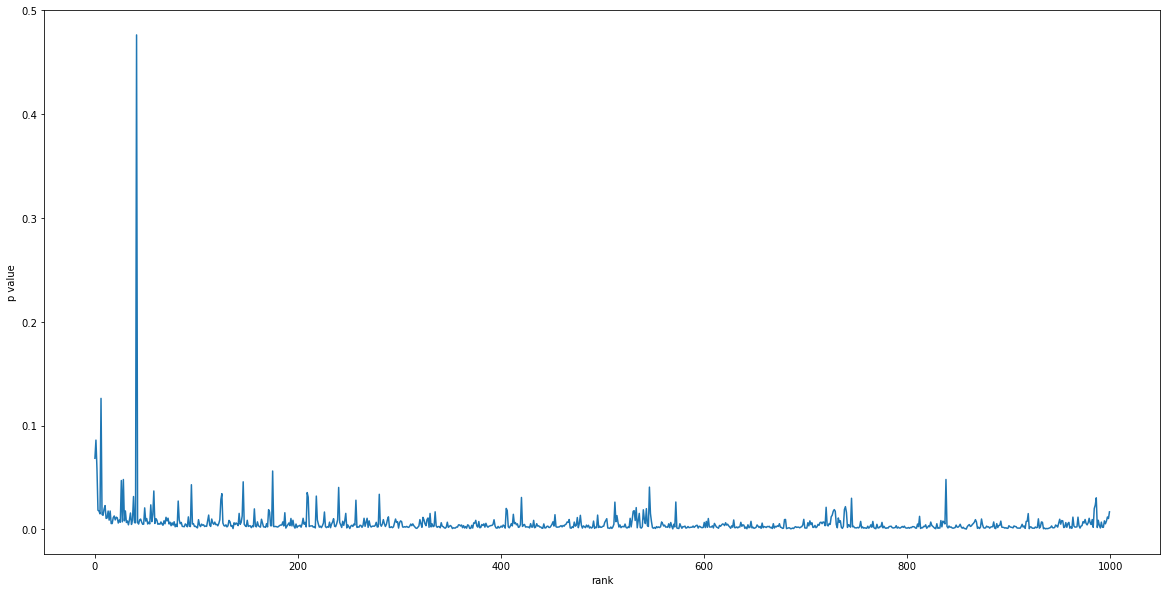

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

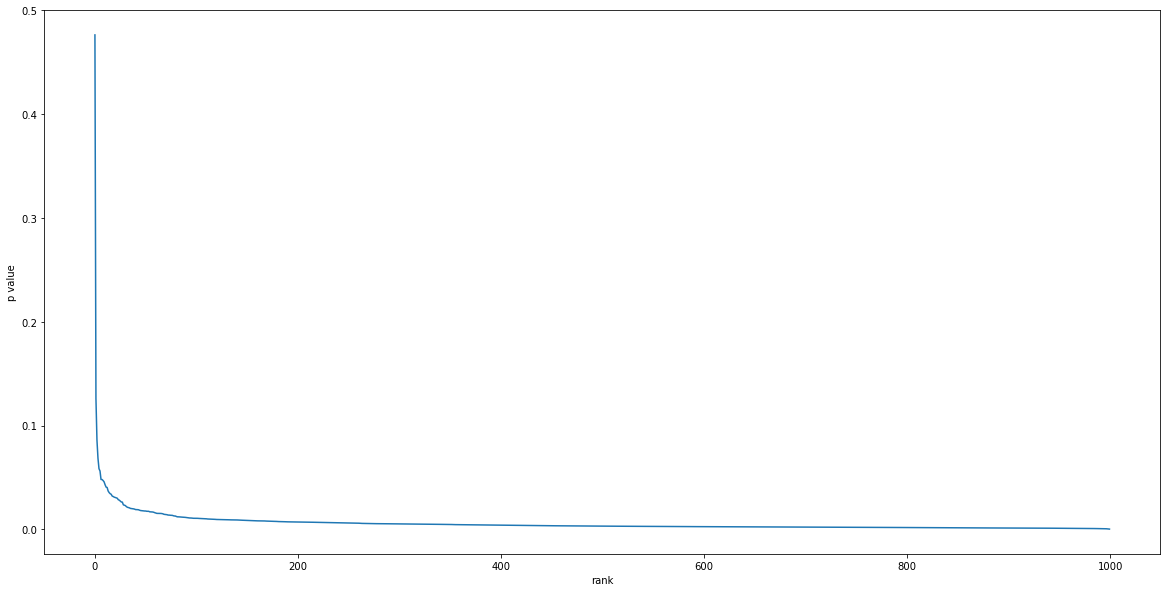

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

In [43]:
s_value

[0.00040497277816118395,
 0.0005085704655977659,
 0.0004907904613430336,
 0.00021349380123230607,
 0.00028399201157954527,
 0.0002523826634498571,
 0.002252614641995173,
 0.000259980903220927,
 0.0002540065945863047,
 0.00037382102599493904,
 0.0004474155174228866,
 0.00020955398529769238,
 0.00022586109542631282,
 0.00039146093219896656,
 0.00021003990758244065,
 0.0004518124630730198,
 0.0001421572915755402,
 0.00014623596327168332,
 0.00030159273569064734,
 0.0003567394018669362,
 0.00025096202108080976,
 0.00032406157169862274,
 0.0003178235443681668,
 0.00018318678390620837,
 0.0002689749608763693,
 0.00020579211254957719,
 0.0015161148334719029,
 0.00023889154323936931,
 0.0015993176244802217,
 0.00028155613161292826,
 0.0006100382851613447,
 0.00022571957844922866,
 0.0002867912159947558,
 0.0001541782300339192,
 0.0003242842583155749,
 0.0005814454302696184,
 0.00017360441340997647,
 0.0003303479665247394,
 0.0012141589614271038,
 0.00024840685220747707,
 0.00023978161428360632

In [44]:
print(max(s_value))
print(s_value.index(max(s_value)))
print(s_value[155])

0.018322762508809022
41
0.00024869911233547595


In [45]:
count = 0
for i, j in new2.items():
    if count == 73:
        print(i,j)
    count += 1

('said', 'thing') 19


In [46]:
for i,j in word_fdic.items():
    if i == 'said':
        print(i,j)
    elif i == 'thing':
        print(i,j)

said 966
thing 73


In [47]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [48]:
s_value_top_5 = sorted(s_value, reverse=True)[:6]
s_value_top_5

[0.018322762508809022,
 0.008,
 0.005079365079365079,
 0.005050505050505051,
 0.004320372216683284,
 0.004273504273504274]

In [49]:
print(s_value.index(s_value_top_5[0]))
print(s_value.index(s_value_top_5[1]))
print(s_value.index(s_value_top_5[2]))
print(s_value.index(s_value_top_5[3]))
print(s_value.index(s_value_top_5[4]))

41
838
546
986
175


In [50]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[0]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'san':
        print(i,j)
    elif i ==  'sebastian':
        print(i,j)

('san', 'sebastian') 26
san 43
sebastian 33


In [51]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[1]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'end':
        print(i,j)
    elif i ==  'far':
        print(i,j)

('end', 'far') 6
far 30
end 25


In [52]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[2]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'hill':
        print(i,j)
    elif i ==  'road':
        print(i,j)

('hill', 'road') 8
road 63
hill 25


In [53]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[3]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'sebastian':
        print(i,j)
    elif i ==  'train':
        print(i,j)

('sebastian', 'train') 6
train 36
sebastian 33


In [54]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[4]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'bottl':
        print(i,j)
    elif i ==  'wine':
        print(i,j)

('bottl', 'wine') 13
wine 59
bottl 51


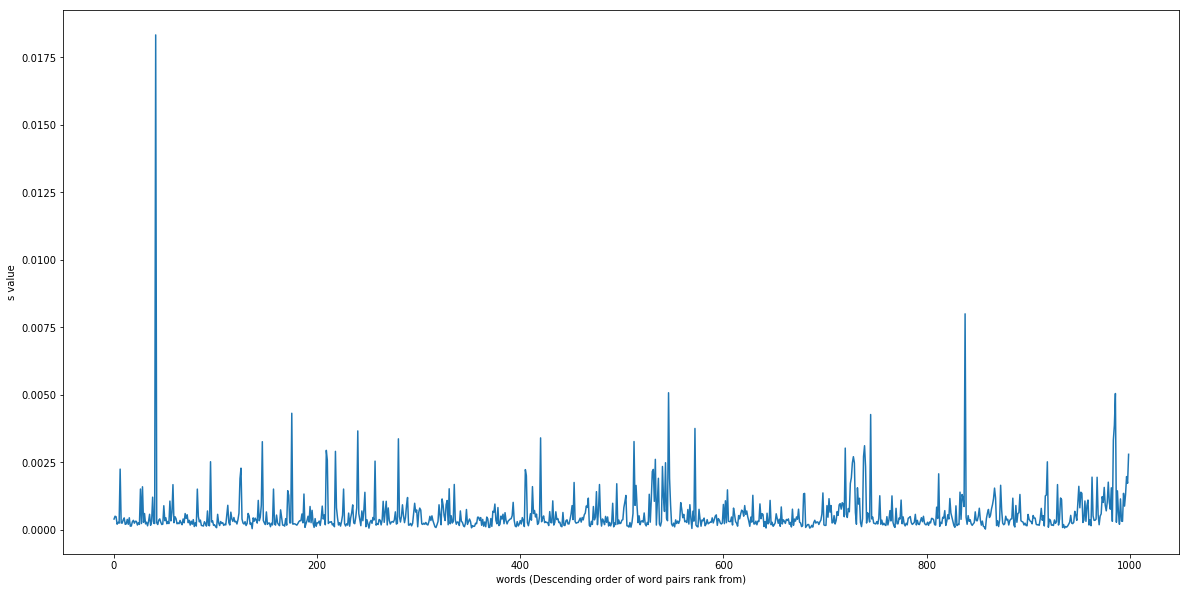

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(s_value)

plt.ylabel('s value')
plt.xlabel('words (Descending order of word pairs rank from)')
plt.show()

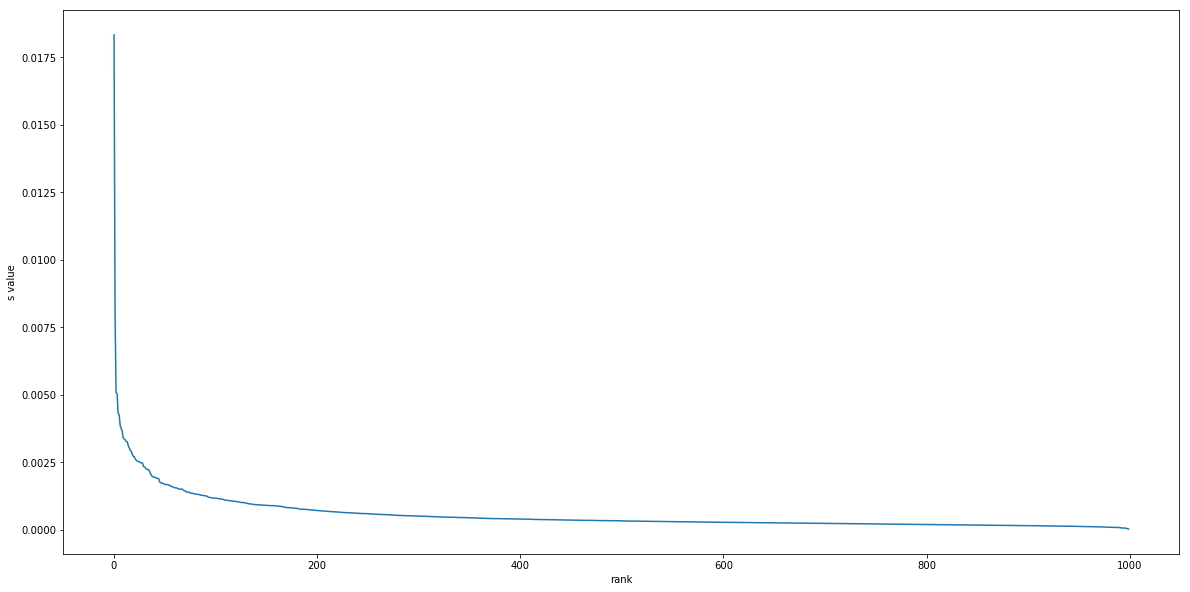

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

In [57]:
from math import log
log_list = [log(y,10) for y in s_value]
log_list

[-3.3925741686167314,
 -3.29364886437335,
 -3.3091038865040003,
 -3.6706147301456826,
 -3.5466938760646403,
 -3.5979404807537803,
 -2.6473130972994254,
 -3.5850585517613673,
 -3.5951550079656345,
 -3.4273362748759437,
 -3.349288957623682,
 -3.67870407533914,
 -3.646158569862112,
 -3.40731157403268,
 -3.6776981814745104,
 -3.345041793404176,
 -3.8472308594360314,
 -3.834945809801091,
 -3.5205791233044548,
 -3.447648920186901,
 -3.600391996778,
 -3.4893724660018175,
 -3.49781393340169,
 -3.737105861910782,
 -3.570288146984062,
 -3.686571274577661,
 -2.8192679031535337,
 -3.6217992240026673,
 -2.7960652768038123,
 -3.550435010334467,
 -3.2146429084112738,
 -3.646430769483623,
 -3.5424341546200937,
 -3.8119769443369536,
 -3.489074132710349,
 -3.235491038364358,
 -3.760439238288355,
 -3.4810283621712457,
 -2.9157244503684856,
 -3.604836428483977,
 -3.620184120325132,
 -1.7370090474866557,
 -3.57630448544912,
 -3.694247087391324,
 -3.4423041343417746,
 -3.386261093721125,
 -3.539264335947454

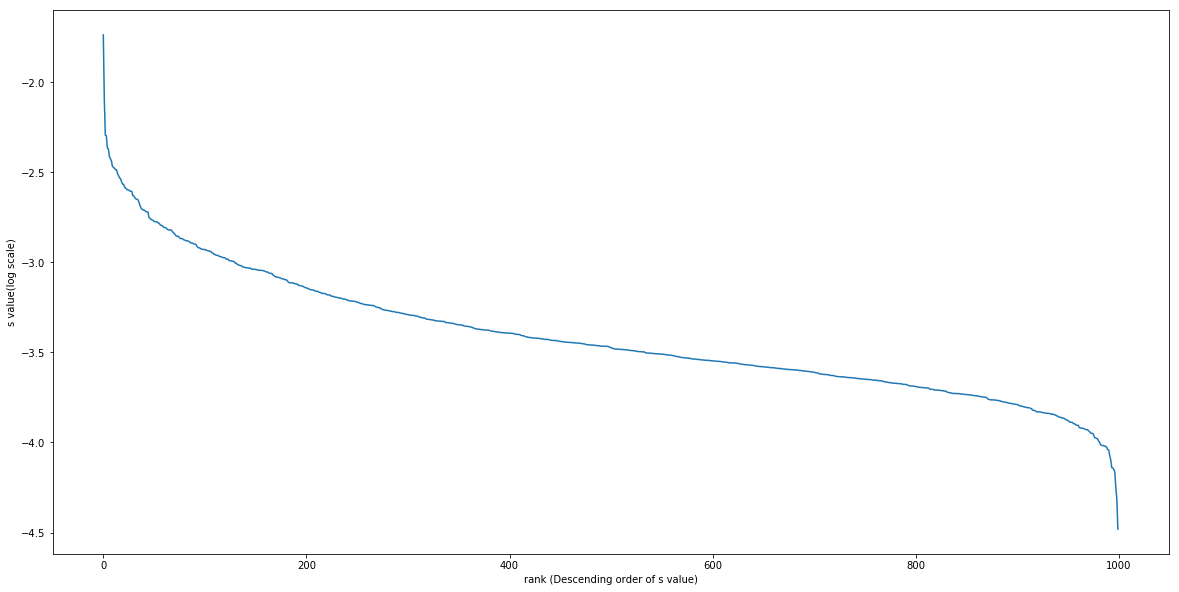

In [58]:
#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


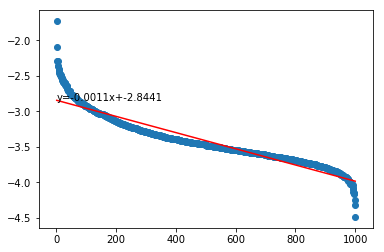

In [59]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

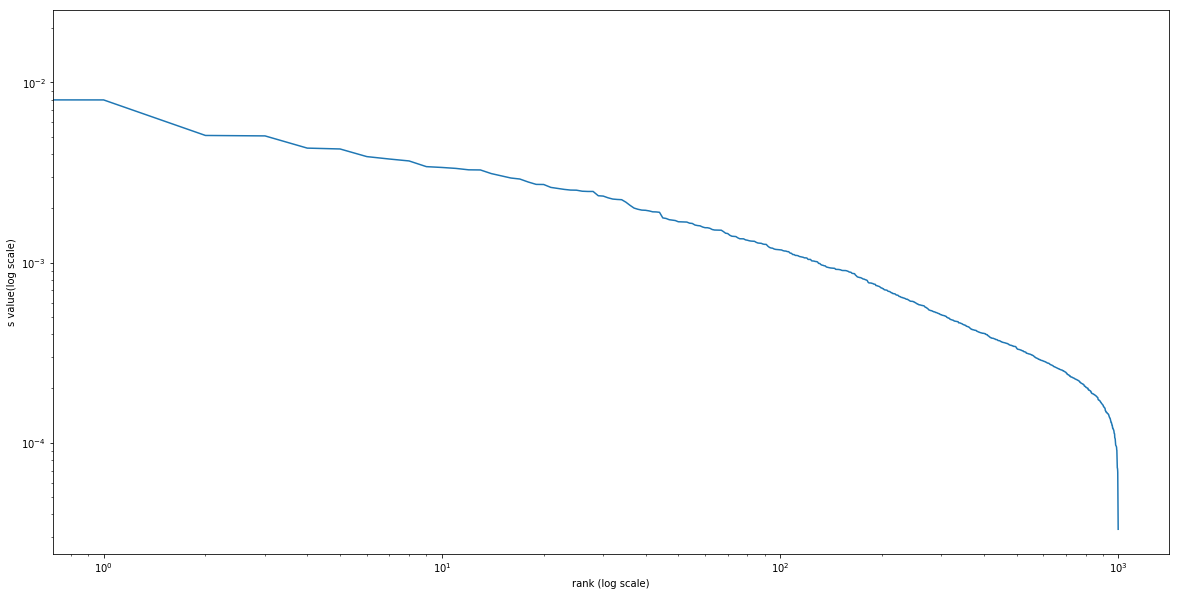

In [60]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

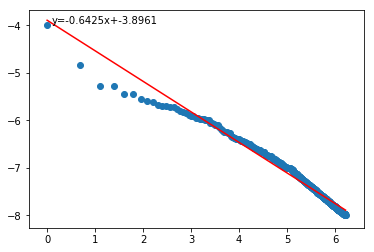

In [61]:
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_value, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_value)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


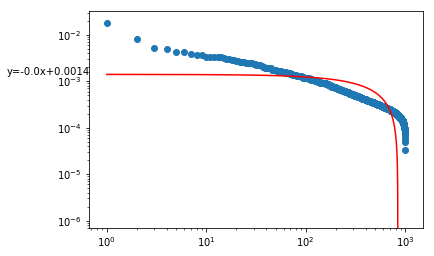

In [78]:
#take a log log graph
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(s_value)+1)
y = sorted(s_value, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)


In [79]:
# i,j count
import numpy as np

len(word_f)

4575

In [80]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

In [81]:
def square(list):
    return [i ** -2 for i in list]
square(i)

[4.7776881961241004e-08,
 4.7797774879745581e-08,
 4.7818681506014942e-08,
 4.7839601852043212e-08,
 4.7860535929837606e-08,
 4.7881483751418487e-08,
 4.7902445328819389e-08,
 4.7923420674087004e-08,
 4.794440979928121e-08,
 4.7965412716475099e-08,
 4.7986429437755003e-08,
 4.800745997522047e-08,
 4.8028504340984323e-08,
 4.8049562547172659e-08,
 4.807063460592487e-08,
 4.8091720529393661e-08,
 4.811282032974506e-08,
 4.8133934019158461e-08,
 4.8155061609826598e-08,
 4.8176203113955607e-08,
 4.8197358543765009e-08,
 4.8218527911487755e-08,
 4.8239711229370227e-08,
 4.8260908509672259e-08,
 4.8282119764667156e-08,
 4.8303345006641711e-08,
 4.8324584247896227e-08,
 4.8345837500744523e-08,
 4.8367104777513981e-08,
 4.8388386090545506e-08,
 4.8409681452193623e-08,
 4.8430990874826423e-08,
 4.8452314370825621e-08,
 4.8473651952586566e-08,
 4.849500363251825e-08,
 4.8516369423043337e-08,
 4.8537749336598178e-08,
 4.8559143385632827e-08,
 4.8580551582611055e-08,
 4.8601973940010386e-08,
 4.86

In [82]:
meddle = len(square(j)) / 2
print(meddle)

meddle = len(square(i)) / 2
print (meddle)

2287.5
2287.5


In [83]:
square(j)[2287]

1.9102401095408088e-07

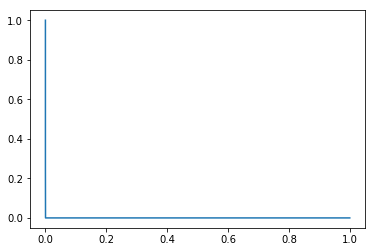

In [84]:
plt.plot(square(i), square(j))

In [88]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (2287**2) / (x)

myu = integrate.quad(computePi, 1, 2287**2)

In [89]:
# 結果にはintegrated value and estimation error
myu

(80913768.61666963, 0.3377905511474637)

In [90]:
(2287**2) * log(2287**2)

80913768.61666948

In [91]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (1.3636492563202415e-07**2) / (x)

myu = integrate.quad(computePi, 1, (1.3636492563202415e-07**2))
print(myu)

(-1.563087078650155e-13, 1.738773443706648e-13)


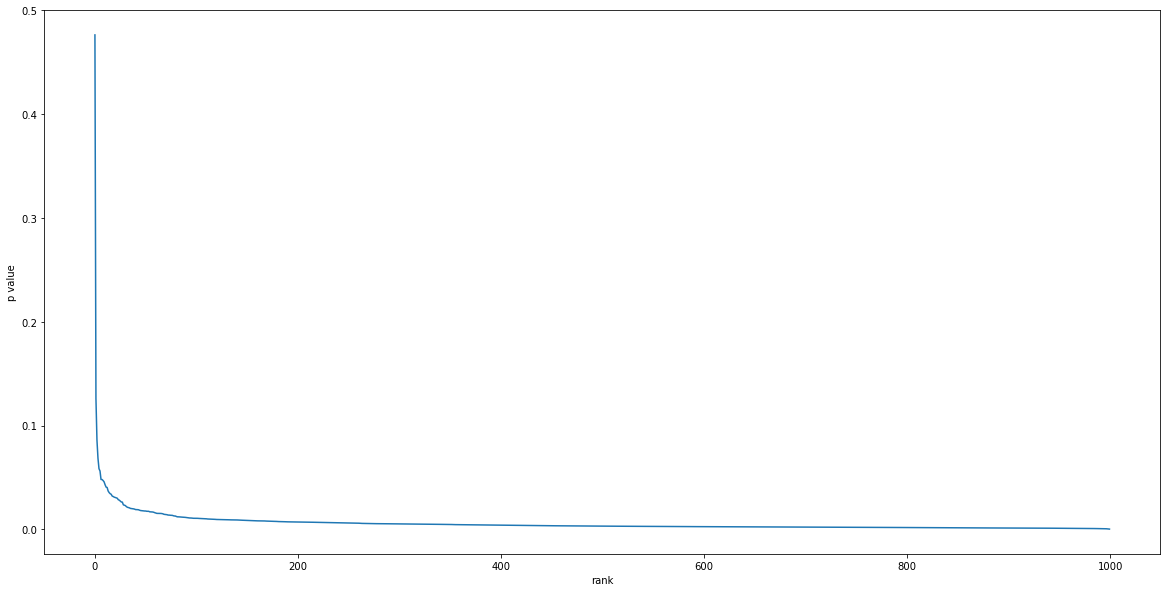

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

# 1/2, 1/3, 2/3

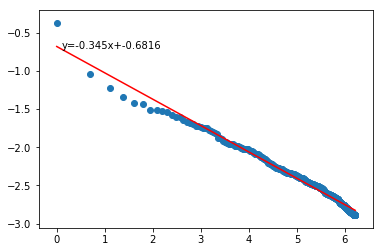

In [62]:
count = 0
s_values_1_2 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (1.0/2.0))
    s_values_1_2.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_1_2, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_1_2)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

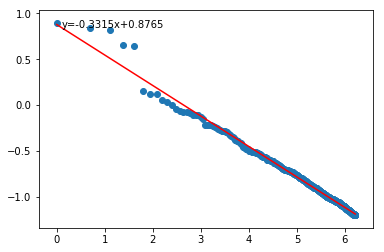

In [63]:
count = 0
s_values_1_3 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (1.0/3.0))
    s_values_1_3.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_1_3, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_1_3)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

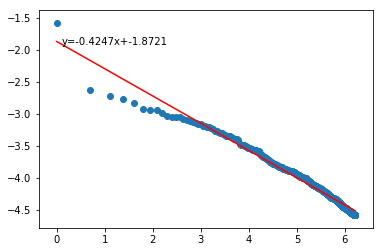

In [64]:
count = 0
s_values_2_3 = []

for i, j in new2.items():
    #print (i)
    
    s = j / math.pow((word_fdic[i[0]]  * word_fdic[i[1]]), (2.0/3.0))
    s_values_2_3.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_values_2_3, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_values_2_3)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()